In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Exploratory Data Analysis

In [2]:
# Import the dataset
df = pd.read_csv('sample_labeled_data (1).csv')
df.head()

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
0,TABLE_1,Column_756,428838.84,2016|02,NO,202104
1,TABLE_1,Column_756,569641.20,2016|03,NO,202104
2,TABLE_1,Column_756,446080.47,2016|04,NO,202104
3,TABLE_1,Column_756,498157.66,2016|05,NO,202104
4,TABLE_1,Column_756,521634.10,2016|06,NO,202104


In [3]:
df.shape

(2745, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Name                        2745 non-null   object 
 1   Column Name                       2745 non-null   object 
 2   Transaction Value (Count or Avg)  2745 non-null   float64
 3   Transcation Month (YYYY|MM)       2745 non-null   object 
 4   IsAnAnomaly                       915 non-null    object 
 5   Snapshot Month (YYYYMM)           2745 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 128.8+ KB


- column IsAnAnomaly has only 915 non null values out of 2745

In [5]:
df.describe()

,Transaction Value (Count or Avg),Snapshot Month (YYYYMM)
count,2.745000e+03,2745.000000
mean,3.349557e+06,202094.377778
std,7.714498e+06,25.830867
min,0.000000e+00,202011.000000
25%,0.000000e+00,202101.000000
50%,1.649302e+05,202102.000000
75%,2.632313e+06,202103.000000
max,3.964377e+07,202104.000000


- Difference between mean and meadian is significant for column Transaction Value (Count or Avg). So, it is not following normal distribution.

In [6]:
df.isna().sum()

Model Name                             0
Column Name                            0
Transaction Value (Count or Avg)       0
Transcation Month (YYYY|MM)            0
IsAnAnomaly                         1830
Snapshot Month (YYYYMM)                0
dtype: int64

- The output feature IsAnAnomaly has 1830 missing records in it.

In [7]:
# Changing Transcation Month (YYYY|MM) and Snapshot Month (YYYYMM) columns data type into datetime objects
df['Transcation Month (YYYY|MM)'] = df['Transcation Month (YYYY|MM)'].apply(lambda x: x.split('|'))
df['Transcation Month (YYYY|MM)'] = df['Transcation Month (YYYY|MM)'].apply(lambda x: ''.join(x))
df['Transcation Month (YYYY|MM)'] = pd.to_datetime(df['Transcation Month (YYYY|MM)'], format='%Y%m')
df['Snapshot Month (YYYYMM)'] = pd.to_datetime(df['Snapshot Month (YYYYMM)'], format='%Y%m')
df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
0,TABLE_1,Column_756,428838.84,2016-02-01,NO,2021-04-01
1,TABLE_1,Column_756,569641.20,2016-03-01,NO,2021-04-01
2,TABLE_1,Column_756,446080.47,2016-04-01,NO,2021-04-01
3,TABLE_1,Column_756,498157.66,2016-05-01,NO,2021-04-01
4,TABLE_1,Column_756,521634.10,2016-06-01,NO,2021-04-01
...,...,...,...,...,...,...
2740,TABLE_1,Column_1815,0.00,2020-08-01,NaN,2021-02-01
2741,TABLE_1,Column_1815,0.00,2020-09-01,NaN,2021-02-01
2742,TABLE_1,Column_1815,0.00,2020-10-01,NaN,2021-02-01
2743,TABLE_1,Column_1815,0.00,2020-11-01,NaN,2021-02-01


In [8]:
# To visualize output variable converting NA to unknown
df['IsAnAnomaly'].fillna(value='unknown',inplace = True)

In [9]:
df.isna().sum()

Model Name                          0
Column Name                         0
Transaction Value (Count or Avg)    0
Transcation Month (YYYY|MM)         0
IsAnAnomaly                         0
Snapshot Month (YYYYMM)             0
dtype: int64

- Now no Nan values present in the dataset

<AxesSubplot:xlabel='IsAnAnomaly', ylabel='Count'>

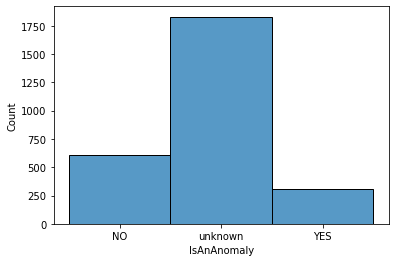

In [10]:
sns.histplot(df['IsAnAnomaly'])

- Clear imbalance between output classes

<AxesSubplot:xlabel='IsAnAnomaly', ylabel='Transaction Value (Count or Avg)'>

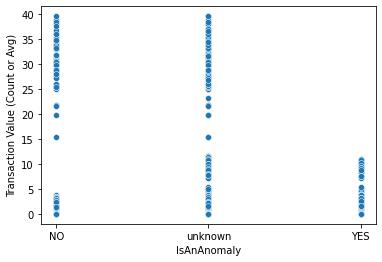

In [11]:
sns.scatterplot(x='IsAnAnomaly',y = df['Transaction Value (Count or Avg)']/1000000,data=df)

- Upon observing the distribution of output feature it is evident that Transaction value upto 15m we can say it is anomaly and above
15m is not anomaly.
- Based on this information we can tell unknkown anomaly class which is anomaly and which is not.
- Here, we can say Transaction value <= 15m is Anomaly, Transaction value > 15m is Not an Anomaly

<AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='Transaction Value (Count or Avg)'>

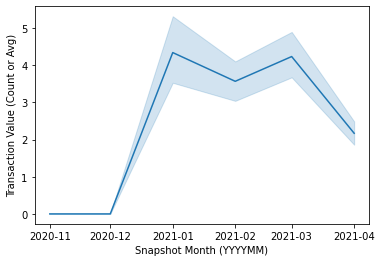

In [12]:
sns.lineplot(x = 'Snapshot Month (YYYYMM)',y=df['Transaction Value (Count or Avg)']/1000000,data=df)

- The transaction values in 2020-11 is 0, In 2020-12 it is started increasing.
- There is a sharp raise in 2021-01.
- In 2021-02 there is a slight dip.
- In 2021-03 there is sligh upward movement we can see.
- In 2021-04 it is again fell down.

In [13]:
df['IsAnAnomaly'].value_counts()

unknown    1830
NO          610
YES         305
Name: IsAnAnomaly, dtype: int64

In [14]:
df['IsAnAnomaly'] = df['IsAnAnomaly'].map({'unknown':2,'NO':0,'YES':1})

<AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>

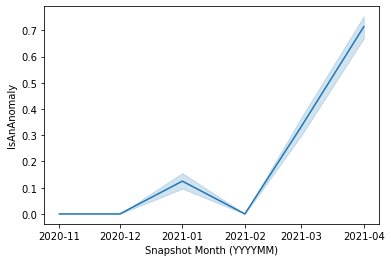

In [15]:
# Anomaly - NO
sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==0)

- Anomaly= NO count incresed over a period of time

<AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>

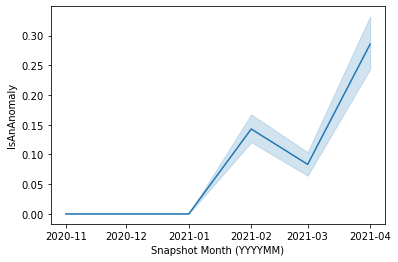

In [16]:
#Anomaly - Yes
sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==1)

- Anomaly = Yes increased over a period of time; In 2021-03 it is deccreased

<AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>

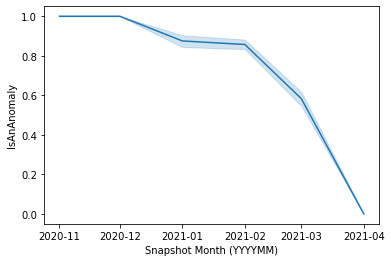

In [17]:
#Anomaly - Unknown (NA) 
sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==2)

- Anomaly=Unknown (NA) is keep on reducing month by month
- By 2021-04 the NA values are decreased to zero.

(<AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>,
 <AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>,
 <AxesSubplot:xlabel='Snapshot Month (YYYYMM)', ylabel='IsAnAnomaly'>)

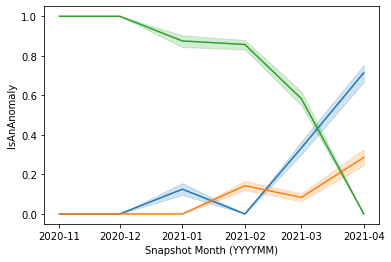

In [18]:
sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==0),sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==1),sns.lineplot(df['Snapshot Month (YYYYMM)'],y = df['IsAnAnomaly']==2)

### EDA  report

##### Patterns that found in  dataset using excel in the Initial analysis

- NA (Missing) = 1830; labelled (Yes and No) = 915; For each of labelled record, there is twice number of Nan's present
- labelled = 915; Yes = 305; No= 610; For each of IsAnAnomaly Yes, there is twice number fo No's present.
- snap 202011 has anomalies as only NA and all transactions are 0
- snap 202012 has anomalies as only NA 
- snap 202102 has anomalies as NA and No 
- snap 202102 has anomalies as NA and Yes
- snap 202103 has anomalies as NA, Yes and No
- snap 202104 has anomalies as Yes and No

##### Missing data:  
    - Only IsAnAnomaly column has missing values total 1830 out of 2745 records   

##### Spikes and drops (Transaction Value (Count or Avg):  
    - The transaction values in 2020-11 is 0, In 2020-12 it is started increasing.
    - There is a sharp raise in 2021-01.
    - In 2021-02 there is a slight dip.
    - In 2021-03 there is sligh upward movement we can see.
    - In 2021-04 it is again fell down. 
        
##### Spikes and drops (IsAnAnomaly):  
    - Anomaly= NO count incresed over a period of time  
    - Anomaly = Yes increased over a period of time  
    - Anomaly = Unknown (NA) is keep on reducing month by month
    - By 2021-04 the NA values are decreased to zero.  
        
        

#### Comaprision of recent snapshot with rest

- According to the data, recent snapshot is 2021-04
- NA values count has become zero in 2021-04
- Anomaly Yes and No are increased compared to other snapshots
- Trasaction count has been decreased in 2021-04 compared to 2020-12,2021-01, 2021,02 and 2021-03. 

### Model Building Ideas

#### Approach 1:
- We can replace NA values with Yes or No anomaly using transaction count
- If transaction value <= 15m it is anomaly
- If transaction value > 15m it is not anomaly 

#### Approach 2:
- Train a supervise ML model using labeled (Yes and No) data
- Use this model to predict labels for unlabeled data (NA) as test data

We are selecting Aprroach 2. Please check 'ML model for prediction' notebook file

Please check Model.ipynb for prediction model.